In [125]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


In [126]:
def initQTable(gameEnvironment):
    return np.zeros((gameEnvironment.observation_space.n, gameEnvironment.action_space.n))

In [127]:
def chooseAction(gameEnvironment, state, QTable, epsilon):
    if np.random.uniform() < epsilon:
        action = gameEnvironment.action_space.sample()
    else:
        action = np.argmax(QTable[state, :])
    return action

In [128]:
def getUpdatedQTable(currentState, nextState, action, reward, QTable, beta, gamma):
    QTable[currentState, action] = QTable[currentState, action] + beta * (reward + gamma * np.max(QTable[nextState, :]) - QTable[currentState, action])
    return QTable

- gamma - dyskont (0;1) - im bliższy 1 tym większą wagę mają odległe w czasie nagrody
- beta - szybkość uczenia (z czasem zmniejszana)

In [129]:
def QLearning(gameEnvironment, maxEpisodes, maxT, gamma, beta, epsilon):
    QTable = initQTable(gameEnvironment)
    episode=0
    episodeRewards = []
    while episode < maxEpisodes:
        currentState = gameEnvironment.reset()[0]
        episodeRewards.append(0)
        t = 0
        while t < maxT:
            action = chooseAction(gameEnvironment, currentState, QTable, epsilon)
            nextState, reward, isEndState, _, _= gameEnvironment.step(action)
            episodeRewards[episode] += reward

            QTable = getUpdatedQTable(currentState,nextState, action, reward, QTable, beta, gamma)
            currentState = nextState
            if isEndState:
                break
            t+=1
        episode+=1
    return QTable, episodeRewards
            
            

In [206]:
def getMeanRewards(episodeRewards, windowSize):
    meanRewards = []
    for i in range(len(episodeRewards)//windowSize):
        meanRewards.append(np.mean(episodeRewards[max(0,i*windowSize):min(len(episodeRewards)-1,(i+1)*windowSize)]))
    return meanRewards

In [216]:
def plotMeanRewards(episodeRewards, episodes, windowSize):
    plt.plot(np.linspace(0,episodes,windowSize),episodeRewards)
    plt.title(f'Mean Reward per {windowSize} episodes')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

In [217]:
gameEnvironment = gym.make('CliffWalking-v0')
maxEpisodes = 100
maxT = 100
beta = 0.5
gamma = 0.7
epsilon = 0.001

QTable, episodeRewards = QLearning(gameEnvironment, maxEpisodes, maxT, gamma, beta, epsilon)


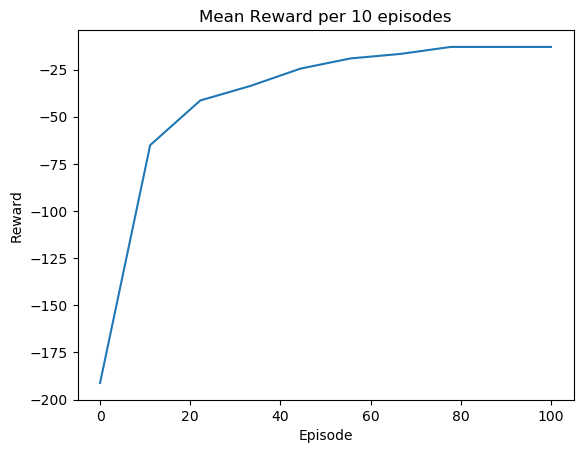

In [224]:
windowSize = 10
meanRewards = getMeanRewards(episodeRewards,windowSize)
plotMeanRewards(meanRewards,maxEpisodes,windowSize)